# Prophet Time Series - Avocado Sales

## Problem Statement

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
    - 4046 - Total number of avocados with PLU 4046 sold
    - 4225 - Total number of avocados with PLU 4225 sold
    - 4770 - Total number of avocados with PLU 4770 sold


## 1. Load Avocado Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

In [2]:
avocado_df = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/Projects/Prophet-Time-Series-Avocado-Market/avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## 2. Explore the Data

In [4]:
avocado_df.shape

(18249, 14)

In [8]:
avocado_df.sort_values('Date', inplace=True)

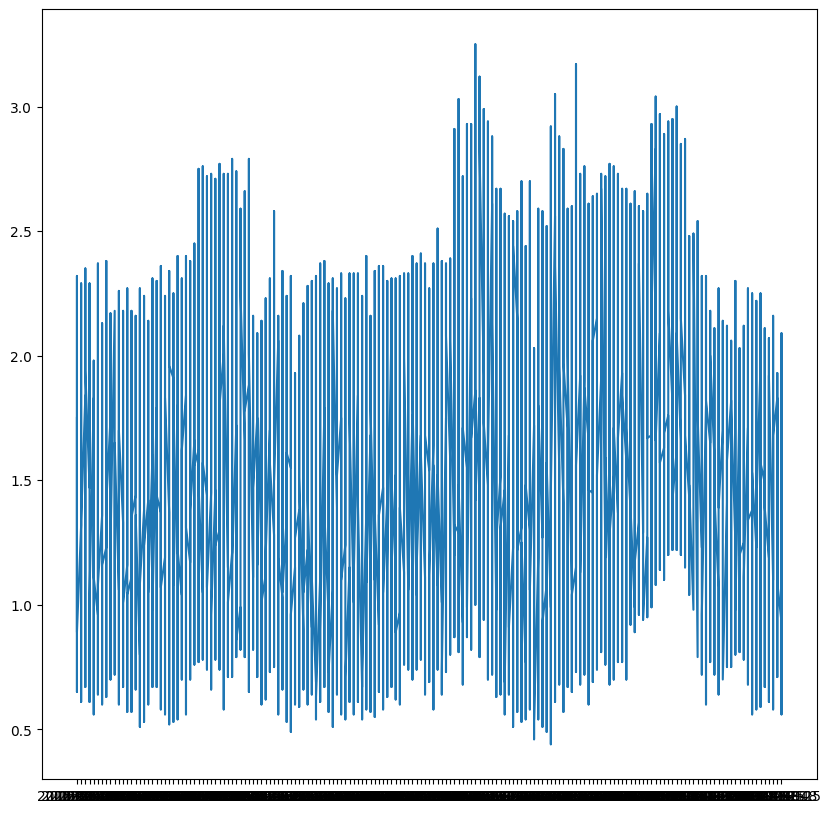

In [9]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice']);

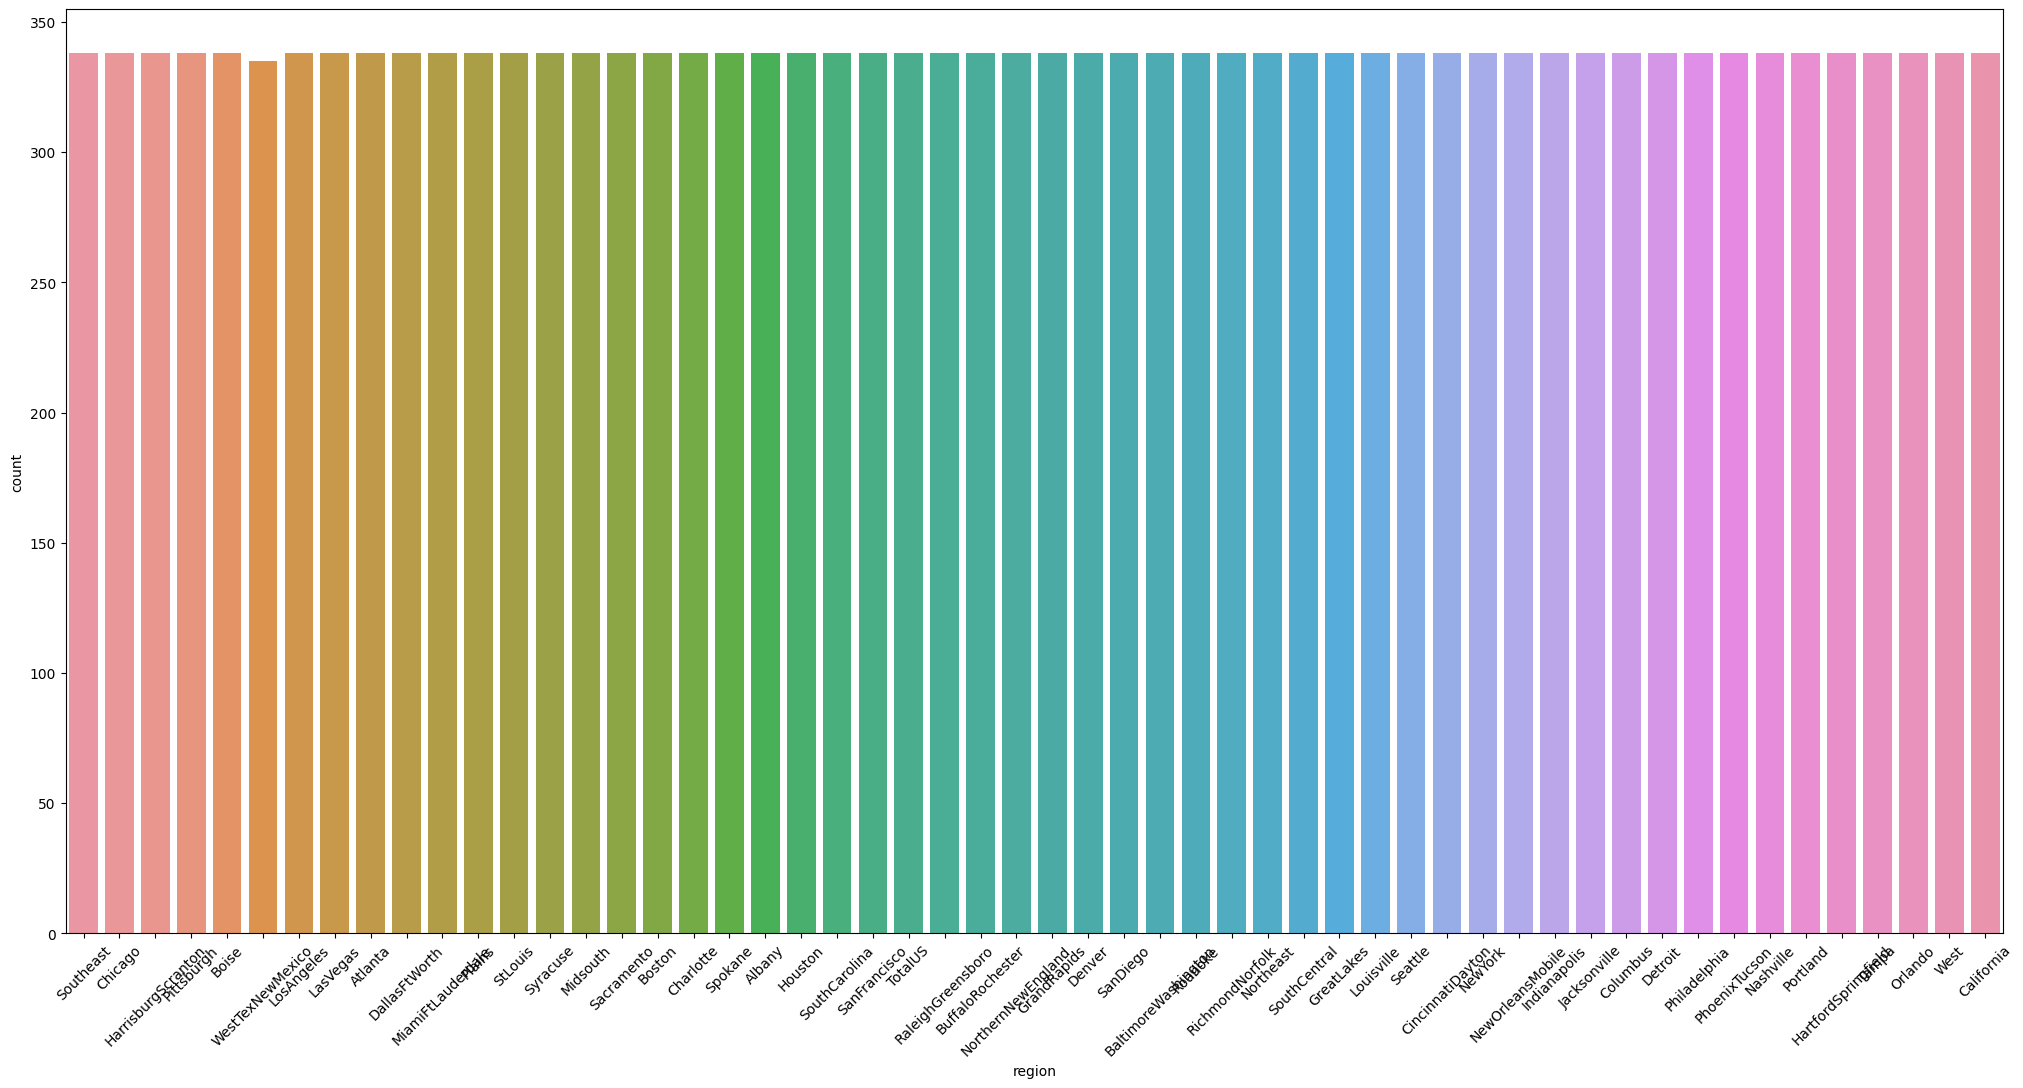

In [14]:
plt.figure(figsize=(25,12))
sns.countplot(x='region', data=avocado_df)
plt.xticks(rotation=45);

<AxesSubplot: xlabel='year', ylabel='count'>

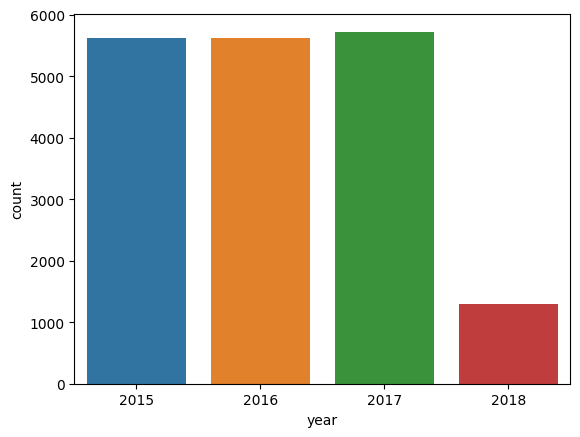

In [15]:
sns.countplot(x='year', data=avocado_df)

In [16]:
avocado_prophet = avocado_df[['Date', 'AveragePrice']]
avocado_prophet.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


## 3. Make Predictions

In [17]:
avocado_prophet_df = avocado_prophet.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [18]:
m = Prophet()
m.fit(avocado_prophet_df)

18:43:16 - cmdstanpy - INFO - Chain [1] start processing
18:43:20 - cmdstanpy - INFO - Chain [1] done processing


### 3.1. Forecast the Future

In [20]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500882,0.906275,1.878561,1.500882,1.500882,-0.117233,-0.117233,-0.117233,-0.117233,-0.117233,-0.117233,0.0,0.0,0.0,1.383650
1,2015-01-11,1.495537,0.913703,1.873308,1.495537,1.495537,-0.108763,-0.108763,-0.108763,-0.108763,-0.108763,-0.108763,0.0,0.0,0.0,1.386773
2,2015-01-18,1.490191,0.900108,1.841613,1.490191,1.490191,-0.108272,-0.108272,-0.108272,-0.108272,-0.108272,-0.108272,0.0,0.0,0.0,1.381919
3,2015-01-25,1.484845,0.897502,1.860635,1.484845,1.484845,-0.126884,-0.126884,-0.126884,-0.126884,-0.126884,-0.126884,0.0,0.0,0.0,1.357961
4,2015-02-01,1.479499,0.867435,1.827225,1.479499,1.479499,-0.154725,-0.154725,-0.154725,-0.154725,-0.154725,-0.154725,0.0,0.0,0.0,1.324774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.153997,0.555694,1.582866,0.955793,1.354691,-0.085254,-0.085254,-0.085254,-0.085254,-0.085254,-0.085254,0.0,0.0,0.0,1.068743
530,2019-03-22,1.153244,0.525483,1.652972,0.953067,1.354860,-0.083486,-0.083486,-0.083486,-0.083486,-0.083486,-0.083486,0.0,0.0,0.0,1.069758
531,2019-03-23,1.152492,0.542031,1.606436,0.951069,1.354778,-0.081444,-0.081444,-0.081444,-0.081444,-0.081444,-0.081444,0.0,0.0,0.0,1.071048
532,2019-03-24,1.151739,0.526680,1.637234,0.949147,1.354696,-0.079146,-0.079146,-0.079146,-0.079146,-0.079146,-0.079146,0.0,0.0,0.0,1.072593


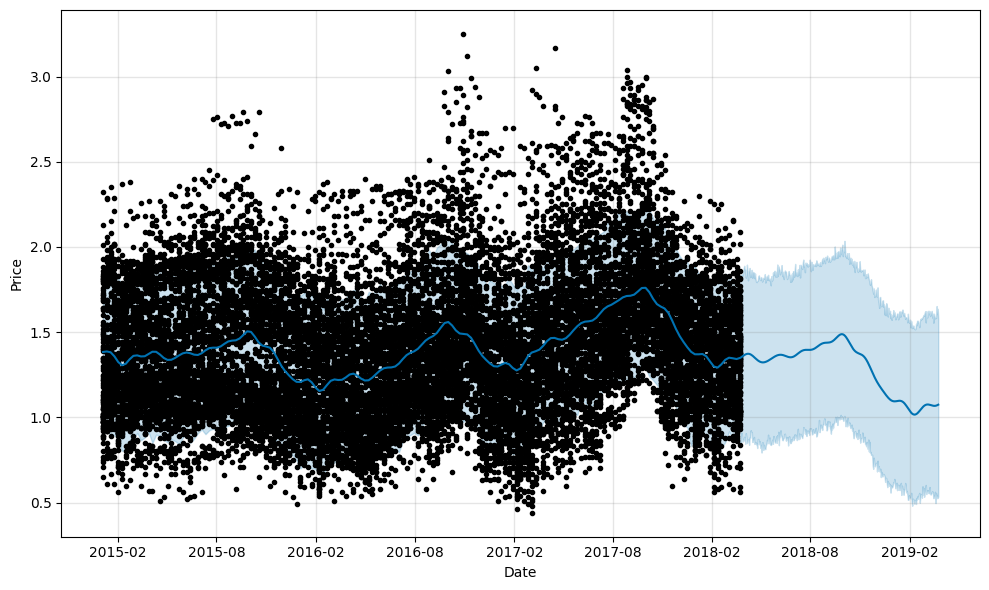

In [21]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

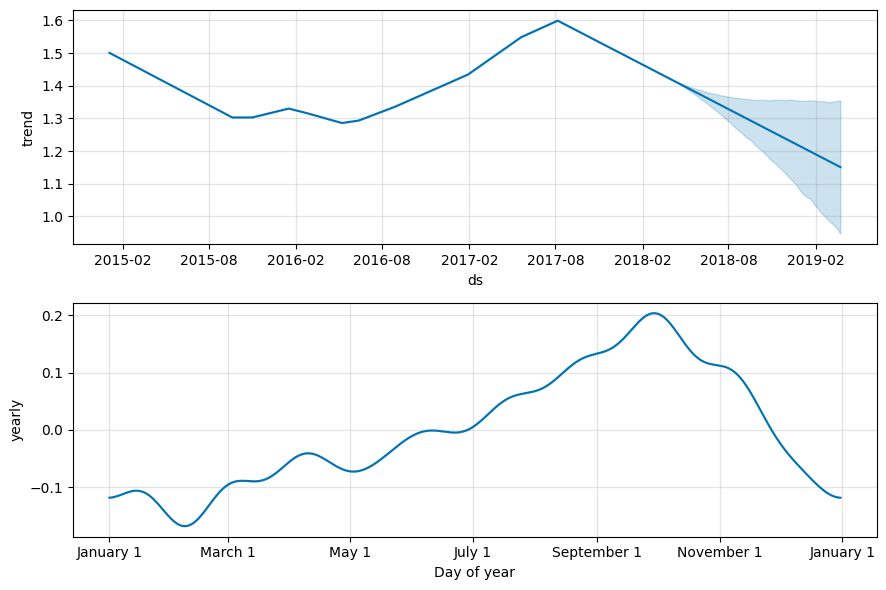

In [22]:
figure = m.plot_components(forecast)

### 3.2. Region Specific Predictions

In [23]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [26]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']
avocado_df_sample.sort_values('Date', inplace=True)
avocado_df_sample

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_70539/2522886506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_df_sample.sort_values('Date', inplace=True)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


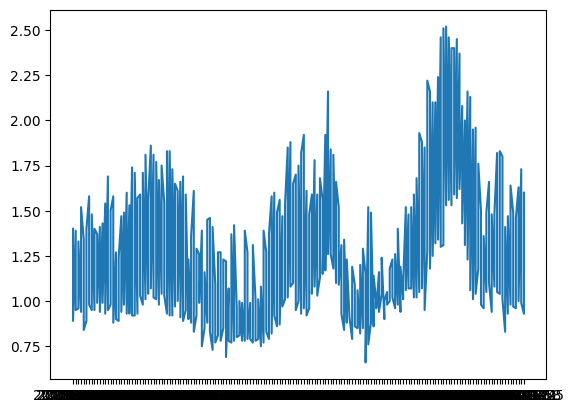

In [28]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice']);

In [31]:
avocado_df_sample = avocado_df_sample[['Date', 'AveragePrice']]
avocado_df_sample.rename(columns={'Date': 'ds', 'AveragePrice': 'y'}, inplace=True)
avocado_df_sample

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_70539/2512559099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_df_sample.rename(columns={'Date': 'ds', 'AveragePrice': 'y'}, inplace=True)


,ds,y
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96
...,...,...
9104,2018-03-11,1.00
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [32]:
m = Prophet()
m.fit(avocado_df_sample)

19:06:37 - cmdstanpy - INFO - Chain [1] start processing


19:06:37 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287027,0.671326,1.542065,1.287027,1.287027,-0.188293,-0.188293,-0.188293,-0.188293,-0.188293,-0.188293,0.0,0.0,0.0,1.098734
1,2015-01-11,1.284781,0.676435,1.545777,1.284781,1.284781,-0.172356,-0.172356,-0.172356,-0.172356,-0.172356,-0.172356,0.0,0.0,0.0,1.112425
2,2015-01-18,1.282535,0.693598,1.596738,1.282535,1.282535,-0.163784,-0.163784,-0.163784,-0.163784,-0.163784,-0.163784,0.0,0.0,0.0,1.118751
3,2015-01-25,1.280290,0.661004,1.531010,1.280290,1.280290,-0.175103,-0.175103,-0.175103,-0.175103,-0.175103,-0.175103,0.0,0.0,0.0,1.105187
4,2015-02-01,1.278044,0.659396,1.507693,1.278044,1.278044,-0.196186,-0.196186,-0.196186,-0.196186,-0.196186,-0.196186,0.0,0.0,0.0,1.081858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.725564,1.074254,1.972701,1.690885,1.761309,-0.207996,-0.207996,-0.207996,-0.207996,-0.207996,-0.207996,0.0,0.0,0.0,1.517568
530,2019-03-22,1.726124,1.111341,1.943462,1.691210,1.762097,-0.202966,-0.202966,-0.202966,-0.202966,-0.202966,-0.202966,0.0,0.0,0.0,1.523158
531,2019-03-23,1.726684,1.132318,1.960968,1.691620,1.762885,-0.197365,-0.197365,-0.197365,-0.197365,-0.197365,-0.197365,0.0,0.0,0.0,1.529319
532,2019-03-24,1.727243,1.119442,1.977507,1.691939,1.763674,-0.191298,-0.191298,-0.191298,-0.191298,-0.191298,-0.191298,0.0,0.0,0.0,1.535946


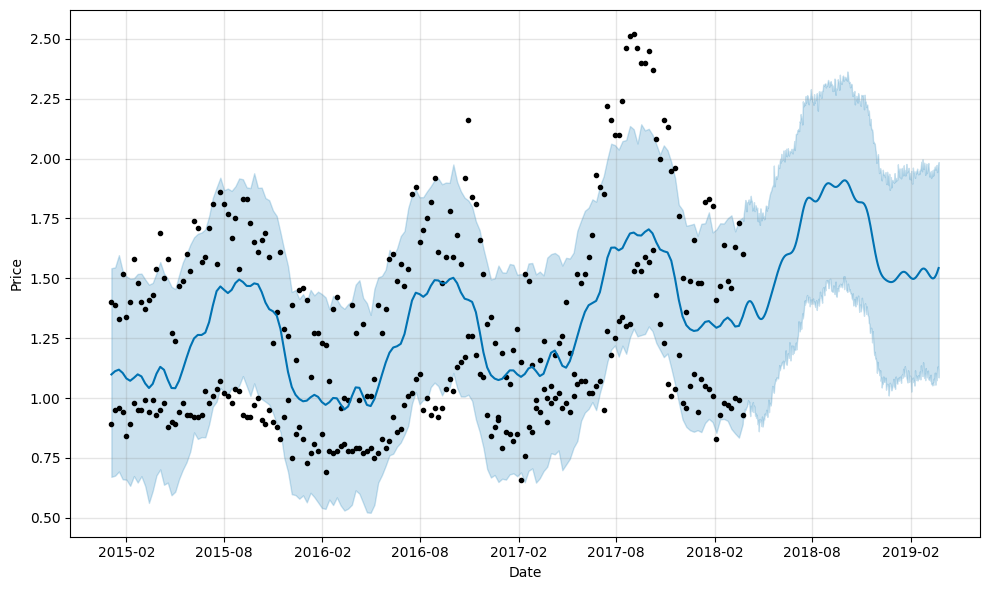

In [34]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

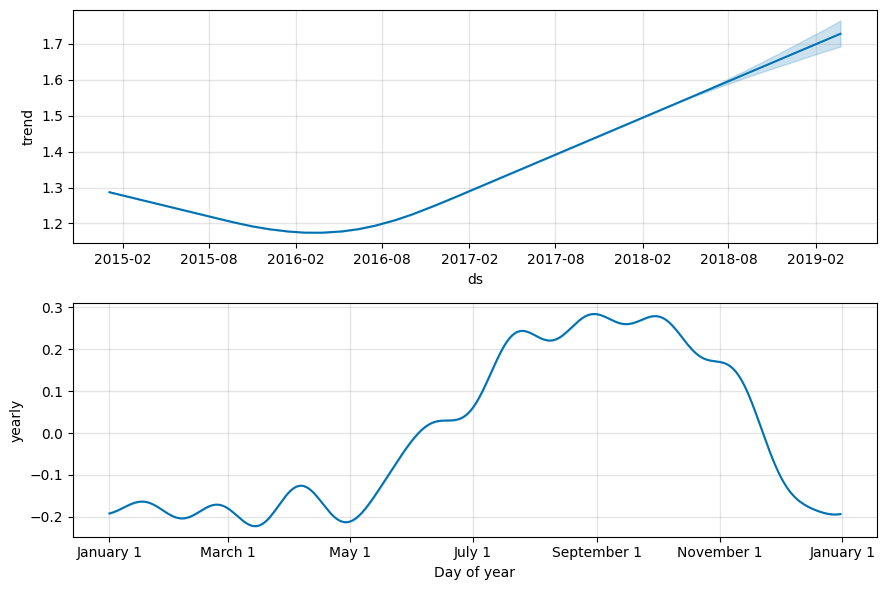

In [35]:
figure = m.plot_components(forecast)